In [1]:
import numpy as np  # its supported funtion for array, mtrices, wide range of application
import pandas as pd # supports data strcture, and function for data maniplation and data analyst
import matplotlib.pyplot as plt  # it used for static, interactive and animated visulization python
import seaborn as sns # build on top of matplotlib, its provide high level interface for attractive statstical graph

In [2]:
df=pd.read_csv('ipl_data.csv')

In [3]:
df.head(2)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222


In [4]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [8]:
df.shape

(76014, 15)

Text(0.5, 1.0, 'Wickets Distribustion')

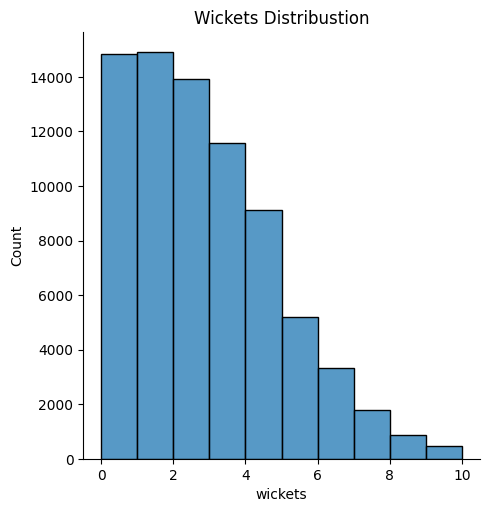

In [9]:
sns.displot(df['wickets'],kde=False,bins=10)
plt.title('Wickets Distribustion')

Text(0.5, 1.0, 'Runs Distribution')

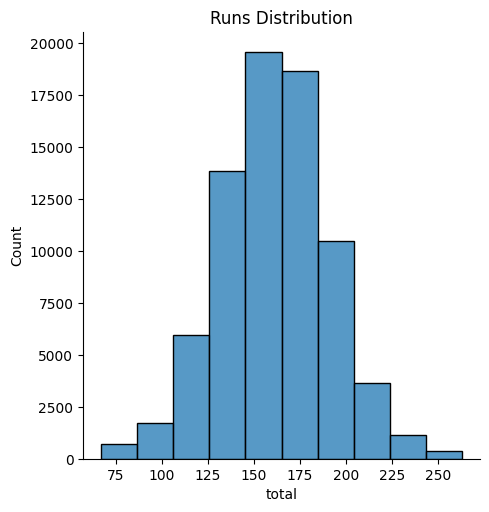

In [10]:
sns.displot(df['total'],kde=False,bins=10)
plt.title('Runs Distribution')

In [11]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [12]:
irrelevant=['mid', 'date', 'venue','batsman', 'bowler','striker',
       'non-striker']
print("Before removing col",df.shape)

df=df.drop(irrelevant,axis=1)
print("After removing col",df.shape)


Before removing col (76014, 15)
After removing col (76014, 8)


In [13]:
df.columns

Index(['bat_team', 'bowl_team', 'runs', 'wickets', 'overs', 'runs_last_5',
       'wickets_last_5', 'total'],
      dtype='object')

In [14]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [15]:
const_team=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [16]:
print('Before removing inconsistent team',df.shape)

df=df[(df['bat_team'].isin(const_team)) & (df['bowl_team'].isin(const_team))]

print('After removing inconsistent team :',df.shape)

Before removing inconsistent team (76014, 8)
After removing inconsistent team : (53811, 8)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53811 entries, 0 to 75888
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bat_team        53811 non-null  object 
 1   bowl_team       53811 non-null  object 
 2   runs            53811 non-null  int64  
 3   wickets         53811 non-null  int64  
 4   overs           53811 non-null  float64
 5   runs_last_5     53811 non-null  int64  
 6   wickets_last_5  53811 non-null  int64  
 7   total           53811 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 3.7+ MB


In [18]:
df['overs'].unique()

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  5.1,  5.2,
        5.3,  5.4,  5.5,  5.6,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  7.1,
        7.2,  7.3,  7.4,  7.5,  7.6,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        9.1,  9.2,  9.3,  9.4,  9.5,  9.6, 10.1, 10.2, 10.3, 10.4, 10.5,
       10.6, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 12.1, 12.2, 12.3, 12.4,
       12.5, 12.6, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 16.1, 16.2,
       16.3, 16.4, 16.5, 16.6, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 18.1,
       18.2, 18.3, 18.4, 18.5, 18.6, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6,
       12. ,  4. ,  7. , 19. ,  0. , 15. ,  1. , 18. ,  2. , 11. , 14. ,
        6. ,  5. ,  9. , 13. , 16. ,  8. , 17. , 10. ])

In [19]:
# remove first 5 overs

print('Before removing over', df.shape)

df=df[df['overs']>=0.5]

print('after removing over',df.shape)

Before removing over (53811, 8)
after removing over (51945, 8)


In [20]:
df.head(2)

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
5,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.5,2,0,222
6,Kolkata Knight Riders,Royal Challengers Bangalore,3,0,0.6,3,0,222


In [21]:
cat_col=df.select_dtypes('object')
num_col=df.select_dtypes(['int64','float64'])

In [22]:
cat_col.head()

,bat_team,bowl_team
5,Kolkata Knight Riders,Royal Challengers Bangalore
6,Kolkata Knight Riders,Royal Challengers Bangalore
7,Kolkata Knight Riders,Royal Challengers Bangalore
8,Kolkata Knight Riders,Royal Challengers Bangalore
9,Kolkata Knight Riders,Royal Challengers Bangalore


In [23]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [24]:
le=LabelEncoder()

In [25]:
for col in ['bat_team','bowl_team']:
  df[col]=le.fit_transform(df[col])


In [26]:
df.head(2)

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
5,3,6,2,0,0.5,2,0,222
6,3,6,3,0,0.6,3,0,222


<Axes: >

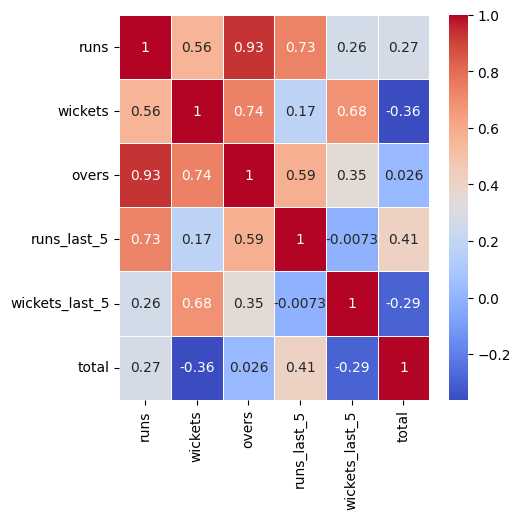

In [27]:
corr_matrix=num_col.corr()

plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.5)

In [28]:
df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
5,3,6,2,0,0.5,2,0,222
6,3,6,3,0,0.6,3,0,222
7,3,6,3,0,1.1,3,0,222
8,3,6,7,0,1.2,7,0,222
9,3,6,11,0,1.3,11,0,222


In [29]:
from sklearn.compose import ColumnTransformer

In [30]:
ColumnTransformer=ColumnTransformer([('encoder',OneHotEncoder(),[0,1])]
                  ,remainder='passthrough')

In [31]:
ipl_df = np.array(ColumnTransformer.fit_transform(df))

In [32]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']



In [33]:
df=pd.DataFrame(ipl_df,columns=cols)

In [34]:
print(df.shape)

(51945, 22)


In [35]:
x=df.drop('total',axis=1)
y=df['total']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST=train_test_split(x,y,test_size=0.20,random_state=42)

In [38]:
print(X_TRAIN.shape)
print(X_TEST.shape)
print(Y_TRAIN.shape)
print(Y_TEST.shape)

(41556, 21)
(10389, 21)
(41556,)
(10389,)


In [39]:
from sklearn.metrics import accuracy_score

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
RF_model=RandomForestRegressor()

In [42]:
RF_model.fit(X_TRAIN,Y_TRAIN)

RandomForestRegressor()

In [43]:
Y_Pred_RF=RF_model.predict(X_TEST)

In [44]:
train_score_RF = str(RF_model.score(X_TRAIN, Y_TRAIN) * 100)
test_score_RF = str(RF_model.score(X_TEST, Y_TEST) * 100)


In [45]:
print('Train Score :',train_score_RF)
print('Test Score',test_score_RF)

Train Score : 96.62765423504425
Test Score 84.50544045220923
